In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


In [2]:
teams =  pd.read_csv("teams.csv")
#print(teams)
#print("\n")

In [3]:
teams = teams[["team", "country","year", "athletes","age", "prev_medals", "medals" ]]
teams = teams.dropna()

print(teams)

     team      country  year  athletes   age  prev_medals  medals
0     AFG  Afghanistan  1964         8  22.0          0.0       0
1     AFG  Afghanistan  1968         5  23.2          0.0       0
2     AFG  Afghanistan  1972         8  29.0          0.0       0
3     AFG  Afghanistan  1980        11  23.6          0.0       0
4     AFG  Afghanistan  2004         5  18.6          0.0       0
...   ...          ...   ...       ...   ...          ...     ...
2139  ZIM     Zimbabwe  2000        26  25.0          0.0       0
2140  ZIM     Zimbabwe  2004        14  25.1          0.0       3
2141  ZIM     Zimbabwe  2008        16  26.1          3.0       4
2142  ZIM     Zimbabwe  2012         9  27.3          4.0       0
2143  ZIM     Zimbabwe  2016        31  27.5          0.0       0

[2014 rows x 7 columns]


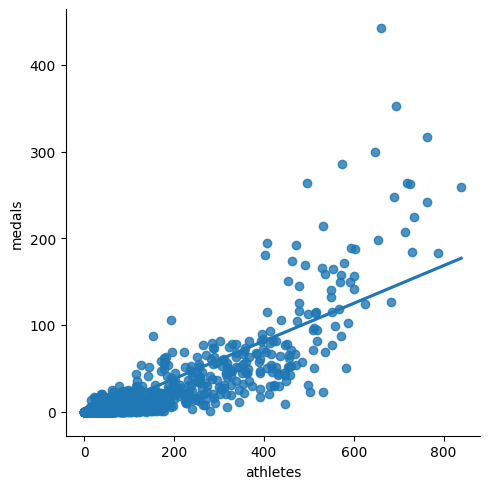

In [4]:
sns.lmplot(x = "athletes", y = "medals", data = teams, fit_reg= True, ci=None)

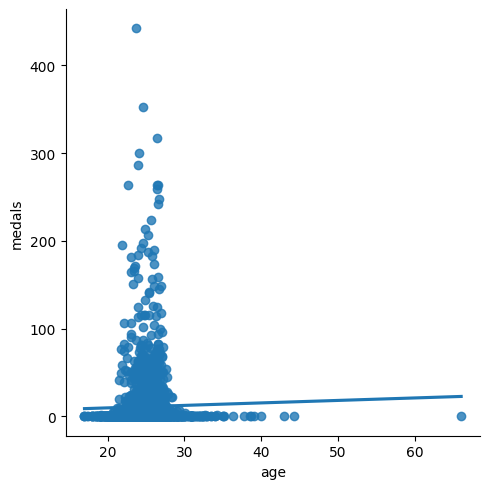

In [5]:
sns.lmplot(x = "age", y = "medals", data = teams, fit_reg= True, ci=None)

<Axes: ylabel='Frequency'>

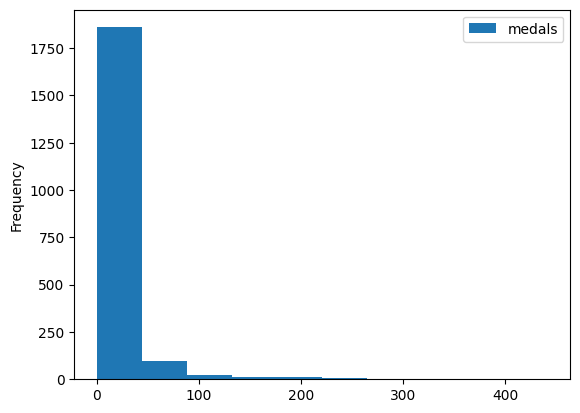

In [6]:
teams.plot.hist(y = "medals")

In [7]:
train = teams[teams["year"] <2016].copy()
test = teams[teams["year"]>= 2016].copy()

In [8]:
reg = LinearRegression()

In [9]:
predictors = ["athletes", "prev_medals"]
target = "medals"

In [10]:
reg.fit(train[predictors], train[target])

LinearRegression()

In [11]:
predictions = reg.predict(test[predictors])
print(predictions)

[-1.15605453e+00 -1.66241134e+00  4.07671602e+00 -1.80981333e+00
 -1.88391472e-01 -1.44130836e+00  2.88157493e+01  2.58359586e+00
 -1.58871035e+00 -1.80981333e+00  1.19002914e+02  4.15996715e+00
  1.02553492e+01  3.60585963e+00 -1.58871035e+00 -1.14650439e+00
 -1.36760737e+00  1.02484992e+01 -1.66241134e+00 -1.51500936e+00
 -1.95721532e+00 -1.29390638e+00 -1.88351433e+00  2.50924990e+01
 -1.22020538e+00 -3.45343602e-01  8.37831898e+01  1.05497528e+00
 -1.88351433e+00  3.62495991e+00 -1.73611234e+00 -1.66241134e+00
 -1.66241134e+00  6.77545738e+01 -1.73611234e+00 -1.36760737e+00
 -1.95721532e+00  1.35932939e+00  1.25604653e+02 -9.99102402e-01
 -4.83195446e-01 -1.80981333e+00 -1.44130836e+00  1.52861170e+01
 -1.80981333e+00 -1.73611234e+00 -1.22020538e+00  3.02106679e+01
  1.86190619e+01  1.70563353e-01  1.80294539e+01  2.00739815e+01
 -1.51500936e+00 -1.95721532e+00  1.56133209e+00  8.43422439e-01
  9.44733841e+00 -1.22020538e+00 -1.36760737e+00  7.04788104e+01
  2.96165097e+00  5.78823

In [12]:
test["predictions"] = predictions
test

,team,country,year,athletes,age,prev_medals,medals,predictions
7,AFG,Afghanistan,2016,3,24.7,1.0,0,-1.156055
25,ALB,Albania,2016,6,23.7,0.0,0,-1.662411
38,ALG,Algeria,2016,74,24.0,1.0,2,4.076716
49,AND,Andorra,2016,4,26.0,0.0,0,-1.809813
58,ANG,Angola,2016,26,27.5,0.0,0,-0.188391
...,...,...,...,...,...,...,...,...
2091,VIE,Vietnam,2016,28,26.9,0.0,2,-0.040989
2099,VIN,Saint Vincent and the Grenadines,2016,4,20.8,0.0,0,-1.809813
2111,YEM,Yemen,2016,3,19.3,0.0,0,-1.883514
2132,ZAM,Zambia,2016,7,24.1,0.0,0,-1.588710


In [13]:
test.loc[test["predictions"]<0, "predictions"] = 0
test["predictions"] = test["predictions"].round()
test

,team,country,year,athletes,age,prev_medals,medals,predictions
7,AFG,Afghanistan,2016,3,24.7,1.0,0,0.0
25,ALB,Albania,2016,6,23.7,0.0,0,0.0
38,ALG,Algeria,2016,74,24.0,1.0,2,4.0
49,AND,Andorra,2016,4,26.0,0.0,0,0.0
58,ANG,Angola,2016,26,27.5,0.0,0,0.0
...,...,...,...,...,...,...,...,...
2091,VIE,Vietnam,2016,28,26.9,0.0,2,0.0
2099,VIN,Saint Vincent and the Grenadines,2016,4,20.8,0.0,0,0.0
2111,YEM,Yemen,2016,3,19.3,0.0,0,0.0
2132,ZAM,Zambia,2016,7,24.1,0.0,0,0.0


In [14]:
error = mean_absolute_error(test["medals"], test["predictions"])
error

3.4477611940298507

In [15]:
teams.describe()["medals"]

count    2014.000000
mean       10.990070
std        33.627528
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max       442.000000
Name: medals, dtype: float64

In [16]:
a= test[test["team"] == "USA"]
b = test[test["team"] == "IND"]
c = test[test["team"] == "CAN"]
print(a)
print(b)
print(c)


     team        country  year  athletes   age  prev_medals  medals  \
2054  USA  United States  2016       719  26.4        248.0     264   

      predictions  
2054        231.0  
    team country  year  athletes   age  prev_medals  medals  predictions
908  IND   India  2016       130  26.1          6.0       2         12.0
    team country  year  athletes   age  prev_medals  medals  predictions
349  CAN  Canada  2016       405  26.0         55.0      69         68.0


In [17]:
errors = (test["medals"]- test["predictions"]).abs()
errors

7       0.0
25      0.0
38      2.0
49      0.0
58      0.0
       ... 
2091    2.0
2099    0.0
2111    0.0
2132    0.0
2143    0.0
Length: 201, dtype: float64

In [18]:
errors_by_team = errors.groupby(test["team"]).mean()
errors_by_team

team
AFG    0.0
ALB    0.0
ALG    2.0
AND    0.0
ANG    0.0
      ... 
VIE    2.0
VIN    0.0
YEM    0.0
ZAM    0.0
ZIM    0.0
Length: 201, dtype: float64

In [19]:
medals_by_team = test["medals"].groupby(test["team"]).mean()
medals_by_team


team
AFG    0.0
ALB    0.0
ALG    2.0
AND    0.0
ANG    0.0
      ... 
VIE    2.0
VIN    0.0
YEM    0.0
ZAM    0.0
ZIM    0.0
Name: medals, Length: 201, dtype: float64

In [20]:
error_ratio = errors_by_team/medals_by_team
error_ratio

team
AFG    NaN
ALB    NaN
ALG    1.0
AND    NaN
ANG    NaN
      ... 
VIE    1.0
VIN    NaN
YEM    NaN
ZAM    NaN
ZIM    NaN
Length: 201, dtype: float64

In [21]:
error_ratio[~pd.isnull(error_ratio)]

team
ALG    1.000000
ARG    0.318182
ARM    0.250000
AUS    0.451220
AUT    1.000000
         ...   
UKR    1.466667
USA    0.125000
UZB    0.538462
VEN    1.000000
VIE    1.000000
Length: 92, dtype: float64

In [22]:
error_ratio[np.isfinite(error_ratio)]

team
ALG    1.000000
ARG    0.318182
ARM    0.250000
AUS    0.451220
AUT    1.000000
         ...   
UKR    1.466667
USA    0.125000
UZB    0.538462
VEN    1.000000
VIE    1.000000
Length: 85, dtype: float64